<a href="https://colab.research.google.com/github/yanghuaizhi/tf_learning/blob/master/classsify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)


10000

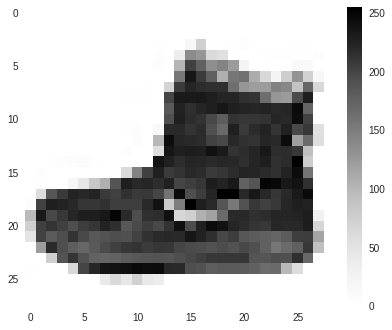

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

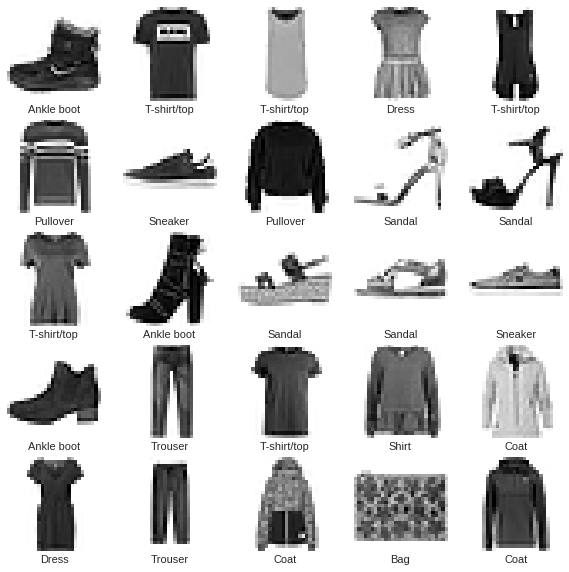

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4951 - accuracy: 0.8273
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3760 - accuracy: 0.8644
Epoch 3/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3389 - accuracy: 0.8746
Epoch 4/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3150 - accuracy: 0.8849
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2975 - accuracy: 0.8907


In [16]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2833 - accuracy: 0.8947
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2702 - accuracy: 0.8989
Epoch 3/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2591 - accuracy: 0.9033
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2531 - accuracy: 0.9064
Epoch 5/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2420 - accuracy: 0.9099


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3259 - accuracy: 0.8870

Test accuracy: 0.887


In [0]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([4.25590486e-07, 3.10948572e-10, 2.14828368e-08, 8.74533723e-10,
       2.93126359e-08, 3.72183765e-03, 8.24905158e-07, 1.33751575e-02,
       5.29849622e-08, 9.82901692e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

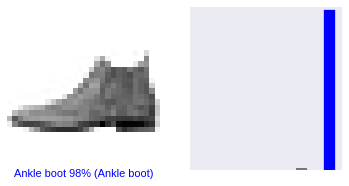

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

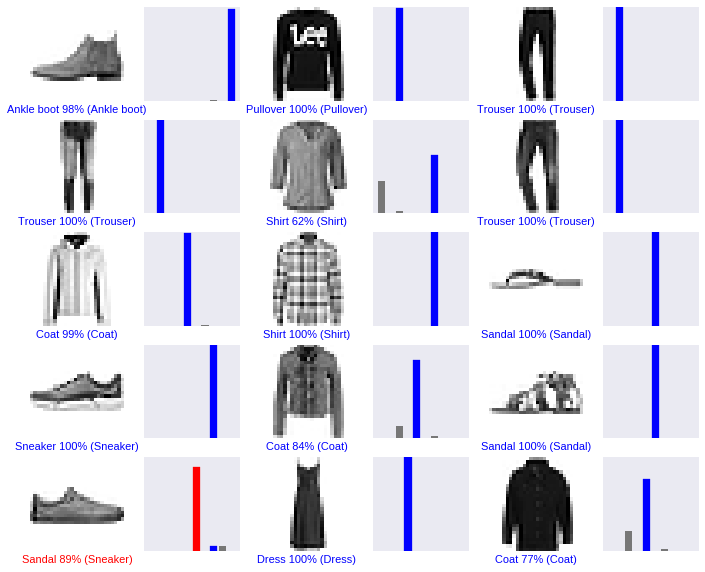

In [23]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [24]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)
